In [1]:
import glob,sys,os,re
from mylab.ana.miniscope.context_exposure.Canamini import *
from mylab.ana.miniscope.context_exposure.ana_funtions import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from core.context_exposure import *


# indexes all celltypes

In [6]:
celltypes = index_celltypes()
celltypes = [i for i in celltypes if "aim_test"  in i or "aim_train" in i ]
celltypes = [i for i in celltypes if "20103" not in i]
# celltypes_2020061 = [i for i in celltypes if "20200805" in i or "20200806" in i or "20200807" in i];
celltypes

['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200810_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200811_aim_train.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200812_aim_train.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200814_aim_train.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200816_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200818_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200819_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200820_aim_test.pkl',
 '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day2020

## Celltypes[mouseid][stage]

In [8]:
def func(celltypefile):
    stat_info = load_pkl(celltypefile)["stat_info"]
    return stat_info["Total_Accuracy"],stat_info["aim"],stat_info['Trial_Num']


Celltypes = {}
for mouseid in mouseids:
    celltypefiles = [i for i in celltypes if mouseid in i]
    Celltypes[mouseid]={}
    Celltypes[mouseid]["train"]=[]
    Celltypes[mouseid]["40"]=[]
    Celltypes[mouseid]["40-50"]=[]
    Celltypes[mouseid]["50-60"]=[]
    Celltypes[mouseid]["60-70"]=[]
    Celltypes[mouseid]["70-80"]=[]
    Celltypes[mouseid]["80"] = []
    for celltypefile in celltypefiles:
        TA,aim,TN = func(celltypefile)
        if TN>30:        
            if aim=="test":            
                if TA>=0.4 and TA<0.5:
                    Celltypes[mouseid]["40-50"].append(celltypefile)
                elif TA>=0.5 and TA<0.6:
                    Celltypes[mouseid]["50-60"].append(celltypefile)
                elif TA <0.4:
                    Celltypes[mouseid]["40"].append(celltypefile)
                elif TA<0.7 and TA>=0.6:
                    Celltypes[mouseid]["60-70"].append(celltypefile)
                elif TA<0.8 and TA>=0.7:
                    Celltypes[mouseid]["70-80"].append(celltypefile)
                else:
                    Celltypes[mouseid]["80"].append(celltypefile)
            else:
                Celltypes[mouseid]["train"].append(celltypefile)

## Sessions[stage][session] &celltypes[stage][session]
in any stage, there might be more than one sessions of one mouse, we pick up the first one.

In [33]:
stages = ['train', '40', '40-50', '50-60', '60-70', '70-80', '80']
sessions_stages={}
celltypes_stages={}
for stage in stages:
    sessions_stages[stage]=[]
    celltypes_stages[stage]=[]
for mouseid in mouseids:
    for stage in stages:
        if len(Celltypes[mouseid][stage])==0:
            pass
        else :
            celltypes_stages[stage].append(Celltypes[mouseid][stage][0])
            session = index_sessions(*mouseid_part_day_aim(Celltypes[mouseid][stage][0]))[0]
            sessions_stages[stage].append(session) # 取众多session中的一个就好



In [37]:
celltypes_stages

{'train': ['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200811_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206534_part5_day20200812_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206552_part5_day20200811_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206551_part5_day20200812_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206550_part5_day20200811_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206553_part5_day20200812_aim_train.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_206548_part5_day20200811_aim_train.pkl'],
 '40': ['\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltype_2020061_part5_day20200818_aim_test.pkl',
  '\\\\10.10.47.163\\Data_archive\\qiushou\\results\\celltypes\\celltyp

# dataframe allneurons*placebins in specific day

In [30]:
all_cells_stages={}
for stage in stages:
    all_cells_stages[stage]=generate_NormedMeanfr_of_Allcells_along_placebins_of_sessions(sessions_stages[stage])

result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place

result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place

cell firing is standarized along the placebins
cell firing is standarized along the placebins
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context' has been added
'Context' was represented as 0,1,2 or -1
FUN::add_alltrack_placebin_num
'place_bin_No' has been added
FUN::add_Body_speed
Body_speed is trimed by FUN: speed_optimize with 'gaussian_filter1d' with sigma=3
speed filter sigma is default to be 3
Body_speed and Body_speed_angle have been added
FUNC::SingleCell_MeanFr_in_SingleTrial_along_Placebin
trim_index was initialed by Trial_Num>=0
trim_index : placebins are limited in [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37]
trim_index : Body_speed>3 cm/s
'S_dff' is taken as original self.df
trim_df : df was trimmed.
result is loaded
FUN:: add_Trial_Num_Process
'Trial_Num' and 'process' were added
FUN::add_Context
'Contex' came frome 'Enter_ctx'
'Context'

# plot

## Cellids of context, running direction and place cells

In [143]:
ids_of_different_celltype={}
for stage in stages:
    pccell_context_0 = []
    pccell_context_1 = []
    rdcell_left_context_0=[]
    rdcell_right_context_0=[]
    rdcell_left_context_1=[]
    rdcell_right_context_1=[]
    ctxcell_0=[]
    ctxcell_1=[]


    for celltype in celltypes_stages[stage]:
        contextcell_id, rdcell_id,pccell_id,total_cell_num = specific_ids(celltype,contexts=[0,1])
        pccell_context_0.append(pccell_id['context0_pccells'])
        pccell_context_1.append(pccell_id['context1_pccells'])

        rdcell_left_context_0.append(rdcell_id['context0_leftcells'])
        rdcell_right_context_0.append(rdcell_id['context0_rightcells'])
        rdcell_left_context_1.append(rdcell_id['context1_leftcells'])
        rdcell_right_context_1.append(rdcell_id['context1_rightcells'])

        ctxcell_0.append(contextcell_id['ctx0cells'])
        ctxcell_1.append(contextcell_id['ctx1cells'])
    

    ids_of_different_celltype[stage] = {
        "pccell_context_0":pccell_context_0,
        "pccell_context_1":pccell_context_1,
        "pccell":list(set(spread(pccell_context_0)+spread(pccell_context_1))),
        
        "rdcell_left_context_0":rdcell_left_context_0,
        "rdcell_right_context_0":rdcell_right_context_0,
        "rdcell_left_context_1":rdcell_left_context_1,
        "rdcell_right_context_1":rdcell_right_context_1,
        
        "rdcell_left":list(set(spread(rdcell_left_context_0)+spread(rdcell_left_context_1))),
        "rdcell_right":list(set(spread(rdcell_right_context_0)+spread(rdcell_right_context_1))),
        "rdcell":list(set(spread(rdcell_left_context_0)+spread(rdcell_left_context_1)+spread(rdcell_right_context_0)+spread(rdcell_right_context_1))),
        
        "ctxcell_0":ctxcell_0,
        "ctxcell_1":ctxcell_1,
        "ctxcell":list(set(spread(ctxcell_0)+spread(ctxcell_1)))
    }

rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s
rdcells: try body_speed> 3cm/s


## plot different kind of cells

In [40]:
stages

['train', '40', '40-50', '50-60', '60-70', '70-80', '80']

563 2479
(563, 30)


Text(0.5, 1.02, "['ctxcell_1']_40-50_context1")

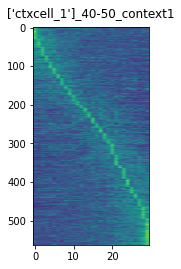

In [76]:
stage = "40-50" #[0,1,2]
all_cells = all_cells_stages[stage] #[all_cells_1,all_cells_2,all_cells_3,all_cells_4]
context = "context1" #["context0","context1","context2"]
celltypes=["ctxcell_1"]
if len(celltypes)==1:
    idxes= spread(ids_of_different_celltype[stage][celltypes[0]])
elif len(celltypes)==2:  
    two_idxes = [spread(ids_of_different_celltype[stage][i]) for i in celltypes]
    idxes = [i for i in two_idxes[0] if i in two_idxes[1]]
elif len(celltypes)==3:
    three_idxes =[spread(ids_of_different_celltype[stage][i]) for i in celltypes]
    idxes_temp = [i for i in three_idxes[0] if i in three_idxes[1]]
    idxes = [i for i in idxes_temp if i in three_idxes[2]]
else:
    print("no specified idxes")
#['pccell_context_0', 'pccell_context_1', 'rdcell_left_context_0', 'rdcell_right_context_0', 
#'rdcell_left_context_1', 'rdcell_right_context_1', 'ctxcell_0', 'ctxcell_1']

    
df = all_cells[context].loc[idxes]
print(len(df),len(all_cells[context]))

sorted_df = df.loc[df.idxmax(axis=1).sort_values().index]
print(sorted_df.shape)
plt.imshow(sorted_df,aspect=0.1) # change aspect when fig is too slim
plt.title("%s_%s_%s"%(celltypes,stage,context),y=1.02)

In [179]:
stages

['train', '40', '40-50', '50-60', '60-70', '70-80', '80']

236 748
(236, 30)


Text(0.5, 1.02, "['ctxcell_1']_80_context1")

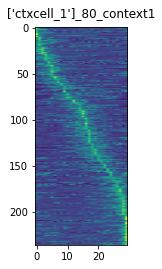

In [181]:
stage = "80" #[0,1,2]
all_cells = all_cells_stages[stage] #[all_cells_1,all_cells_2,all_cells_3,all_cells_4]
context = "context1" #["context0","context1","context2"]
celltypes=["ctxcell_1"]
if len(celltypes)==1:
    idxes= spread(ids_of_different_celltype[stage][celltypes[0]])
elif len(celltypes)==2:  
    two_idxes = [spread(ids_of_different_celltype[stage][i]) for i in celltypes]
    idxes = [i for i in two_idxes[0] if i in two_idxes[1]]
elif len(celltypes)==3:
    three_idxes =[spread(ids_of_different_celltype[stage][i]) for i in celltypes]
    idxes_temp = [i for i in three_idxes[0] if i in three_idxes[1]]
    idxes = [i for i in idxes_temp if i in three_idxes[2]]
else:
    print("no specified idxes")
#['pccell_context_0', 'pccell_context_1', 'rdcell_left_context_0', 'rdcell_right_context_0', 
#'rdcell_left_context_1', 'rdcell_right_context_1', 'ctxcell_0', 'ctxcell_1']


    
df = all_cells[context].loc[idxes]
print(len(df),len(all_cells[context]))

sorted_df = df.loc[df.idxmax(axis=1).sort_values().index]
print(sorted_df.shape)
plt.imshow(sorted_df,aspect=0.3) # change aspect when fig is too slim
plt.title("%s_%s_%s"%(celltypes,stage,context),y=1.02)

## cdf plots

In [146]:
def idxes_dist(stage,context,celltypes):
    all_cells = all_cells_stages[stage] #[all_cells_1,all_cells_2,all_cells_3,all_cells_4]
#     context = "context1" #["context0","context1","context2"]
#     celltypes=["ctxcell_1"]
    if len(celltypes)==1:
        idxes= spread(ids_of_different_celltype[stage][celltypes[0]])
    elif len(celltypes)==2:  
        two_idxes = [spread(ids_of_different_celltype[stage][i]) for i in celltypes]
        idxes = [i for i in two_idxes[0] if i in two_idxes[1]]
    elif len(celltypes)==3:
        three_idxes =[spread(ids_of_different_celltype[stage][i]) for i in celltypes]
        idxes_temp = [i for i in three_idxes[0] if i in three_idxes[1]]
        idxes = [i for i in idxes_temp if i in three_idxes[2]]
    else:
        print("no specified idxes")
    #['pccell_context_0', 'pccell_context_1', 'rdcell_left_context_0', 'rdcell_right_context_0', 
    #'rdcell_left_context_1', 'rdcell_right_context_1', 'ctxcell_0', 'ctxcell_1']


    df = all_cells[context].loc[idxes]

    return df.idxmax(axis=1)

In [ ]:
        "pccell_context_0":pccell_context_0,
        "pccell_context_1":pccell_context_1,
        "pccell":list(set(spread(pccell_context_0)+spread(pccell_context_1))),
        
        "rdcell_left_context_0":rdcell_left_context_0,
        "rdcell_right_context_0":rdcell_right_context_0,
        "rdcell_left_context_1":rdcell_left_context_1,
        "rdcell_right_context_1":rdcell_right_context_1,
        
        "rdcell_left":list(set(spread(rdcell_left_context_0)+spread(rdcell_left_context_1))),
        "rdcell_right":list(set(spread(rdcell_right_context_0)+spread(rdcell_right_context_1))),
        "rdcell":list(set(spread(rdcell_left_context_0)+spread(rdcell_left_context_1)+spread(rdcell_right_context_0)+spread(rdcell_right_context_1))),
        
        "ctxcell_0":ctxcell_0,
        "ctxcell_1":ctxcell_1,
        "ctxcell":list(set(spread(ctxcell_0)+spread(ctxcell_1)))

Text(0.5, 1.0, '')

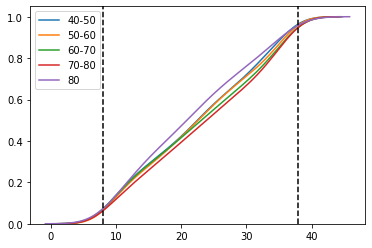

In [191]:
temps=[]
for stage in stages:
    temp = idxes_dist(stage,context = "context0" ,celltypes=["ctxcell"])
    temps.append(temp)
    
fig = plt.figure(0)

for i,temp in enumerate(temps):
    if i >1:
        sns.kdeplot(temp,cumulative =True,legend=True,label=stages[i])
plt.axvline(8,color="black",linestyle="--")
plt.axvline(38,color="black",linestyle="--")
plt.title("")

In [ ]:
right vs wrong

In [ ]:
csi/rdsi/si